In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("fr-esr-enquete-ressources-electroniques-etablissements.csv", sep = ';')
df.sample(3)

,RefusEtablissement,Millesime,Catégorie juridique,EPST,Catégorie,Etablissement2,Ressource,Négociée,Valeur,Code département,...,Académie,Code Région,Région,id Paysage,wikidata,idref,uai,grid,ror,siret
2772,NaN,2016,"Établissement public à caractère scientifique,...",Non,Grand établissement,Institut national d'histoire de l'art (INHA),International Bibliography of Art (IBA),OUI,1385.0,D075,...,Paris,R11,Île-de-France,FDijq,Q3152376,074593714,0755026F,grid.462402.6,045cwqj90,19754688000018
19925,NaN,2015,Sans personnalité juridique - secteur public,Non,Bibliothèque,Bibliothèque interuniversitaire de Santé (BIUS),Conf+,OUI,3563.0,D075,...,Paris,R11,Île-de-France,NXRh2,Q867925,169813738,NaN,grid.473349.e,02bmcpa10,NaN
21349,NaN,2017,"Établissement public à caractère scientifique,...",Non,Grand établissement relevant d'un autre départ...,Institut des sciences et industries du vivant ...,RELX - Elsevier - Freedom Collection,OUI,25222.0,D075,...,Paris,R11,Île-de-France,SsSFH,Q1637105,139408088,0753465J,grid.417885.7,02kbmgc12,13000285000019


In [3]:
# achats pour l'année 2018
df2018 = df[ df["Millesime"] == 2018]
print("nb lignes en 2018 ", len(df2018))

nb lignes en 2018  5726


In [4]:
# regarder les 10 premières ressources
df2018["Ressource"].value_counts()[:20]

RELX - Elsevier - Freedom Collection         150
Cairn - Revues                               102
Wiley-Blackwell - Revues                     102
Europresse                                    97
Techniques de l'ingénieur                     91
Dalloz                                        85
Jstor - Archive Journals Collections          79
Open Edition Freemium for Journals (OEFJ)     75
Springer - Revues                             74
Lexis 360 (ex-Jurisclasseurs)                 67
Cairn - Ebooks                                66
Business Source (+ Econlit en option)         63
EDP Sciences - Revues                         62
Web of Science (WoS)                          62
Lamyline Reflex (2LR)                         61
Lextenso                                      61
Sagaweb                                       55
Dawsonera                                     55
Doctrinal +                                   50
Cyberlibris                                   50
Name: Ressource, dty

In [5]:
# grouper par ressources
ress = df2018.groupby("Ressource")["Valeur"].sum().to_frame()
ress = ress.sort_values(by = "Valeur", ascending = False)
ress[:5]

,Valeur
Ressource,
RELX - Elsevier - Freedom Collection,35279857.01
Wiley-Blackwell - Revues,7327211.85
Web of Science (WoS),2997172.03
IEEE,2415018.96
Scifinder Scholar,2398517.25


In [6]:
print("nb de ress en 2018", len(ress))

nb de ress en 2018 760


<AxesSubplot:xlabel='Ressource'>

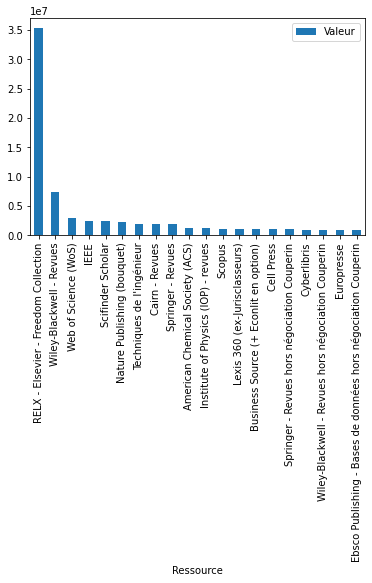

In [7]:
ress[:20].plot(kind = 'bar')

## make beautiful graph

In [8]:
import matplotlib, matplotlib.pyplot  as plt

In [9]:
# réduire à un nb de ressource
nb_ress = 30
ress = ress[:30]

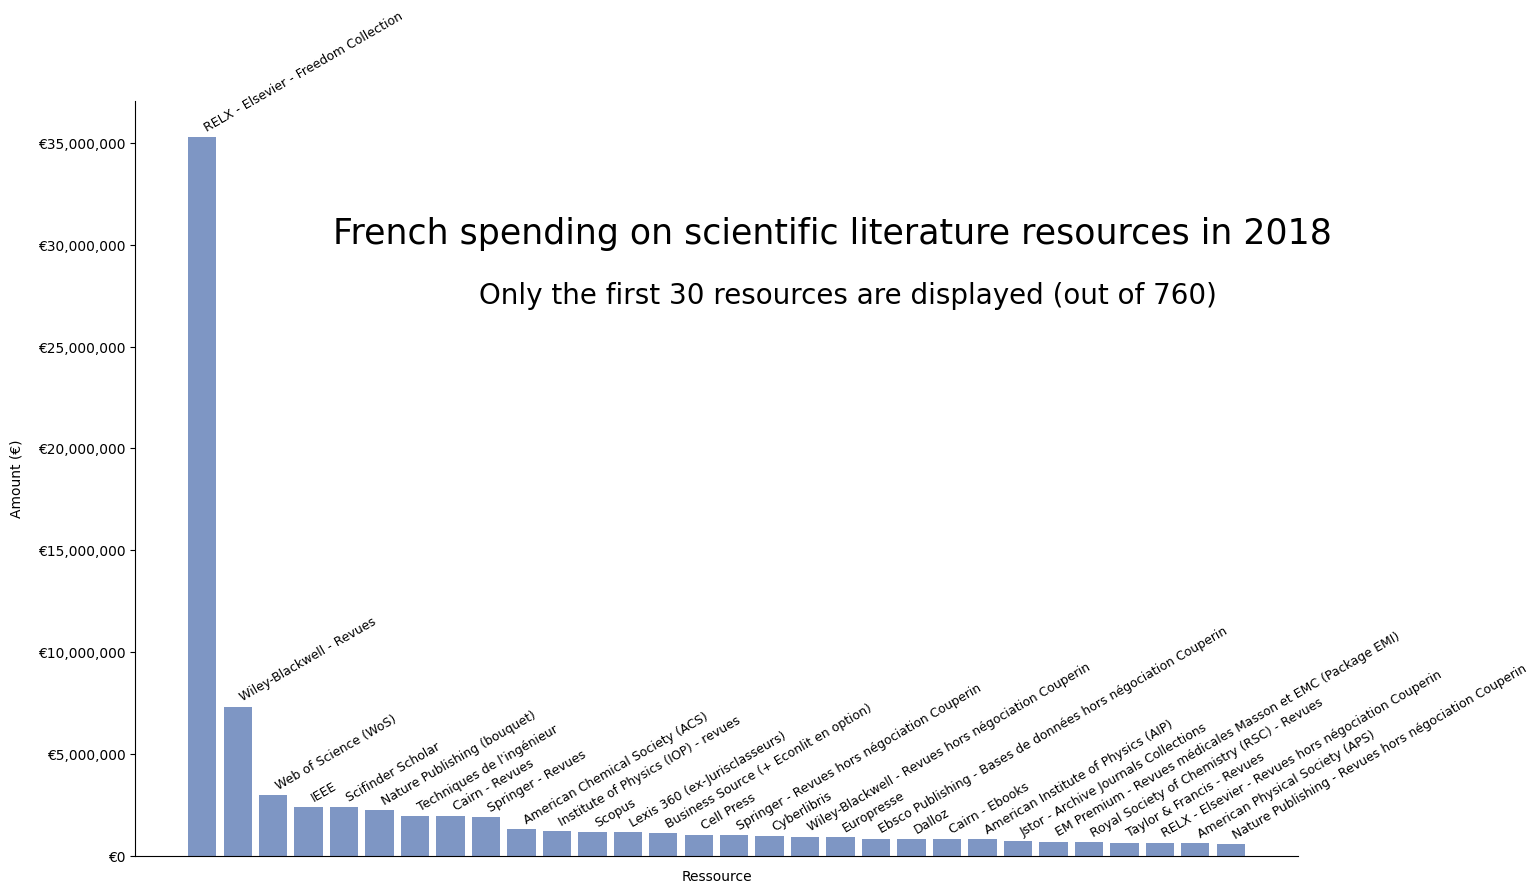

In [10]:
fig, (ax) = plt.subplots(figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')

# Configurer l'affichage
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Amount (€)", labelpad = 10)
ax.set_xlabel("Ressource", labelpad = 10)

#placer les noms en haut des barres 
for x, y in zip(ress.index, ress.Valeur) : 
    plt.annotate(
      x, 
      (x,y),
      textcoords="offset points", # how to position the text
      xytext=(0,2), # distance from text to points (x,y)
      ha='left', # horizontal alignment can be left, right or center
      va = 'bottom', 
      rotation= 30, 
      fontsize = 9
      )


# remove xticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

## set , as thousand separator
ax.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('€{x:,.0f}'))

    
# placer les données à représenter
ax.bar(ress.index, ress.Valeur, color = "#7E96C4")


#ax.legend(loc="upper left")
plt.title("French spending on scientific literature resources in 2018", fontsize = 25, x= 0.6, y = 0.8)
plt.suptitle("Only the first 30 resources are displayed (out of 760)", x = 0.60, y = 0.7, fontsize = 20)

ax.figure.savefig("distribution_for_2018.png")